In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import ttest_1samp
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [56]:
# df = pd.read_csv("/kaggle/input/data-open-2023-additional-data/merged_data_onehotv2.csv")
# df.dropna(inplace=True)
# df.drop(columns={"Unnamed: 0"}, inplace=True)
# df.sort_values(["year_month", "DIST_NUM"], inplace=True)
# df

In [57]:
# df = pd.read_csv("/kaggle/input/data-open-2023-additional-data/df_merged_v3_v2.csv")
# df.dropna(inplace=True)
# df.drop(columns={"Unnamed: 0"}, inplace=True)
# df.sort_values(["year_month", "DIST_NUM"], inplace=True)
# df

In [58]:
# count_cols = df.filter(regex='(?i)count').columns.tolist()

In [59]:
# count_cols[:48]

['AUTOMOBILE_COUNT',
 'BELTED_DEATH_COUNT',
 'BELTED_SUSP_SERIOUS_INJ_COUNT',
 'BICYCLE_COUNT',
 'BICYCLE_DEATH_COUNT',
 'BICYCLE_SUSP_SERIOUS_INJ_COUNT',
 'BUS_COUNT',
 'CHLDPAS_DEATH_COUNT',
 'CHLDPAS_SUSP_SERIOUS_INJ_COUNT',
 'COMM_VEH_COUNT',
 'COUNTY',
 'DRIVER_COUNT_16YR',
 'DRIVER_COUNT_17YR',
 'DRIVER_COUNT_18YR',
 'DRIVER_COUNT_19YR',
 'DRIVER_COUNT_20YR',
 'DRIVER_COUNT_50_64YR',
 'DRIVER_COUNT_65_74YR',
 'DRIVER_COUNT_75PLUS',
 'HEAVY_TRUCK_COUNT',
 'HORSE_BUGGY_COUNT',
 'INJURY_COUNT',
 'MCYCLE_DEATH_COUNT',
 'MCYCLE_SUSP_SERIOUS_INJ_COUNT',
 'MOTORCYCLE_COUNT',
 'NONMOTR_COUNT',
 'NONMOTR_DEATH_COUNT',
 'NONMOTR_SUSP_SERIOUS_INJ_COUNT',
 'PED_COUNT',
 'PED_DEATH_COUNT',
 'PED_SUSP_SERIOUS_INJ_COUNT',
 'PERSON_COUNT',
 'POSSIBLE_INJ_COUNT',
 'SMALL_TRUCK_COUNT',
 'SUV_COUNT',
 'TOT_INJ_COUNT',
 'UNB_DEATH_COUNT',
 'UNB_SUSP_SERIOUS_INJ_COUNT',
 'UNBELTED_OCC_COUNT',
 'UNK_INJ_DEG_COUNT',
 'UNK_INJ_PER_COUNT',
 'VAN_COUNT',
 'VEHICLE_COUNT',
 'DRIVER_COUNT_16_20YR',
 'DRIVER

In [60]:
# # Categorical Columns Dataframe
# included_cols = list(set(df.columns) - set(count_cols))
# ohe_cols = [i for i in included_cols if i not in ["year_month", "DIST_NUM", "tmp_idx", "index"]]

In [61]:
# df = pd.get_dummies(data=df, columns=ohe_cols)

In [62]:
# df

In [63]:
df = pd.read_csv("/kaggle/input/data-open-2023-additional-data/merged_data_onehotv2.csv")
df.dropna(inplace=True)
df.drop(columns={"Unnamed: 0"}, inplace=True)
df.sort_values(["year_month", "DIST_NUM"], inplace=True)
df

,year_month,DIST_NUM,crime_total,ILLUMINATION_1.0,ILLUMINATION_2.0,ILLUMINATION_3.0,ILLUMINATION_4.0,ILLUMINATION_5.0,ILLUMINATION_6.0,ILLUMINATION_8.0,ILLUMINATION_9.0,ILLUMINATION_nan,INTERSECT_TYPE_0,INTERSECT_TYPE_1,INTERSECT_TYPE_10,INTERSECT_TYPE_11,INTERSECT_TYPE_12,INTERSECT_TYPE_2,INTERSECT_TYPE_3,INTERSECT_TYPE_5,INTERSECT_TYPE_6,INTERSECT_TYPE_7,INTERSECT_TYPE_9,LOCATION_TYPE_0,LOCATION_TYPE_1,LOCATION_TYPE_2,LOCATION_TYPE_3,LOCATION_TYPE_4,LOCATION_TYPE_5,LOCATION_TYPE_6,LOCATION_TYPE_7,LOCATION_TYPE_8,LOCATION_TYPE_99,ROAD_CONDITION_0,ROAD_CONDITION_1,ROAD_CONDITION_2,ROAD_CONDITION_3,ROAD_CONDITION_4,ROAD_CONDITION_5,ROAD_CONDITION_6,ROAD_CONDITION_7,ROAD_CONDITION_8,ROAD_CONDITION_9,ROAD_CONDITION_98,ROAD_CONDITION_99,WEATHER1_10,WEATHER1_2,WEATHER1_3,WEATHER1_4,WEATHER1_5,WEATHER1_6,WEATHER1_7,WEATHER1_8,WEATHER1_9,WEATHER1_98,WEATHER1_99,car_crash,index,traffic_stop_total
0,2014-01,1.0,5.416100,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.693147,0.693147,5.948035
1,2014-01,1.0,5.416100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.693147,0.693147,5.948035
2,2014-01,1.0,5.416100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.693147,0.693147,5.948035
3,2014-01,1.0,5.416100,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.098612,1.098612,5.948035
4,2014-01,1.0,5.416100,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.693147,0.693147,5.948035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18511,2018-04,39.0,6.514713,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.693147,0.693147,6.976348
18512,2018-04,39.0,6.514713,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.098612,1.609438,6.976348
18513,2018-04,39.0,6.514713,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.693147,0.693147,6.976348
18514,2018-04,39.0,6.514713,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.693147,0.693147,6.976348


In [64]:
X = df.copy()
X.drop(columns={"DIST_NUM", "year_month", "index", "car_crash"}, inplace=True)
y = df["index"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 20)

In [66]:
# -

In [67]:
# # Import the Random Forest classifier
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score

# dt_regressor = DecisionTreeRegressor(max_features = 10,max_depth =14,random_state = 20)
# dt_regressor.fit(X_train, y_train)
# y_pred = dt_regressor.predict(X_test)

# importance = dt_regressor.feature_importances_

# n = len(y_pred)
# mse = 0
# for i in range(n):
#     mse += (y_test.to_list()[i] - y_pred[i])**2/y_test.to_list()[i]**2
# mse = np.sqrt(mse/n)
# # mse = mean_squared_error(y_test, y_pred)
# print('RMSRE:', mse)

# r2 = r2_score(y_test, y_pred)
# print('R square:', r2)

In [68]:
# import matplotlib.pyplot as plt

# features = pd.DataFrame(X_train.columns.to_list())
# features['importance'] = importance
# features = features.set_index(features.columns[0])
# features = features.sort_values('importance',ascending=False)

# importances_sorted = features.sort_values('importance', ascending=False)

# plt.barh(importances_sorted.index[:20], importances_sorted['importance'][:20])
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

In [69]:
# import matplotlib.pyplot as plt

# importances_sorted = features.sort_values('importance', ascending=False)

# plt.barh(importances_sorted.index[:20], importances_sorted['importance'][:20])
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest classifier object
rfc = RandomForestRegressor(random_state=2023)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Use the classifier to predict the labels of the test data
y_pred = rfc.predict(X_test)

importance = rfc.feature_importances_

n = len(y_pred)
mse = 0
for i in range(n):
    mse += (y_test.to_list()[i] - y_pred[i])**2/y_test.to_list()[i]**2
mse = np.sqrt(mse/n)
# mse = mean_squared_error(y_test, y_pred)
print('RMSRE:', mse)

r2 = r2_score(y_test, y_pred)
print('R square:', r2)

RMSRE: 0.43940090258944264
R square: 0.5066112225749057


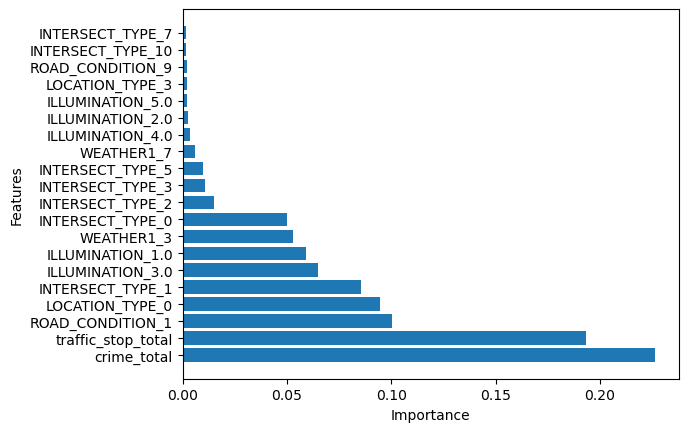

In [71]:
import matplotlib.pyplot as plt

features = pd.DataFrame(X_train.columns.to_list())
features['importance'] = importance
features = features.set_index(features.columns[0])
features = features.sort_values('importance',ascending=False)

importances_sorted = features.sort_values('importance', ascending=False)

plt.barh(importances_sorted.index[:20], importances_sorted['importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [72]:
# -

SyntaxError: invalid syntax (476313318.py, line 1)

In [ ]:
# from scipy.stats import ttest_1samp
# p_values = acorr_ljungbox(residual, lags=[5], boxpierce=False)["lb_pvalue"].values[0]
# # print the p-values
# print("Ljung-Box test p-values:", p_values)

# t_statistic, p_value = ttest_1samp(residual, popmean=0)

# # print the p-value
# print("t-test p-value:", p_value)
# if p_values > 0.05 and p_value > 0.05:
#     print('fail to reject the null hypothesis that the residuals are indenpendent')
#     print('reject the null hypothesis that the mean of residuals are zero')
#     print('Hence, the residuals are independent and have zero mean')

In [ ]:
# features = pd.DataFrame(X_train.columns.to_list())
# features['importance'] = importance
# features = features.set_index(features.columns[0])
# features = features.sort_values('importance',ascending=False)

In [ ]:
# features.index[:14].tolist()

In [ ]:
# import pandas as pd
# pd.read_csv("/kaggle/input/citadel-apac-data-open-2023/APAC_2023_Datasets/Traffic, Investigations _ Other/crimes.csv")["text_general_code"].value_counts()

In [ ]:
# features

In [ ]:
# import matplotlib.pyplot as plt

# importances_sorted = features.sort_values('importance', ascending=False)

# plt.barh(importances_sorted.index[:20], importances_sorted['importance'][:20])
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

## After Fitting Remove the Top 14 Features (Which are mostly counts)

In [ ]:
# X_train.drop(features.index[:14].tolist(), axis=1, inplace=True)
# X_test.drop(features.index[:14].tolist(), axis=1, inplace=True)

In [ ]:
# # Import the Random Forest classifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# # Create a Random Forest classifier object
# rfc = RandomForestRegressor(n_estimators=100, random_state=2023)

# # Train the classifier on the training data
# rfc.fit(X_train, y_train)

# # Use the classifier to predict the labels of the test data
# y_pred = rfc.predict(X_test)

In [ ]:
# importance = rfc.feature_importances_

# n = len(y_pred)
# mse = 0
# for i in range(n):
#     mse += (y_test.to_list()[i] - y_pred[i])**2/y_test.to_list()[i]**2
# mse = np.sqrt(mse/n)
# # mse = mean_squared_error(y_test, y_pred)
# print('RMSRE:', mse)

# r2 = r2_score(y_test, y_pred)
# print('R square:', r2)

# residual = np.asarray(y_test - y_pred)
# plt.figure(1)
# plt.scatter(range(len(residual)),residual)
# plt.plot(range(len(residual)),np.zeros(len(residual)),'r')
# plt.title('residual')
# fig = sm.qqplot(residual)

In [ ]:
# from scipy.stats import ttest_1samp
# p_values = acorr_ljungbox(residual, lags=[5], boxpierce=False)["lb_pvalue"].values[0]
# # print the p-values
# print("Ljung-Box test p-values:", p_values)

# t_statistic, p_value = ttest_1samp(residual, popmean=0)

# # print the p-value
# print("t-test p-value:", p_value)
# if p_values > 0.05 and p_value > 0.05:
#     print('fail to reject the null hypothesis that the residuals are indenpendent')
#     print('reject the null hypothesis that the mean of residuals are zero')
#     print('Hence, the residuals are independent and have zero mean')
    
# features = pd.DataFrame(X_train.columns.to_list())
# features['importance'] = importance
# features = features.set_index(features.columns[0])
# features = features.sort_values('importance',ascending=False)

In [ ]:
# import matplotlib.pyplot as plt

# importances_sorted = features.sort_values('importance', ascending=False)

# plt.barh(importances_sorted.index[:20], importances_sorted['importance'][:20])
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()